Import Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("housing_cleaned_pred_1.csv")

In [ ]:
df.describe()

,id,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,...,parking_options,lat,long,state,ppa,bba,apb,b_a,b_b,apbth
count,4.703900e+04,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,...,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000,47039.000000
mean,7.040810e+09,143.276239,1214.324433,2.188567,1002.945428,1.937541,1.445439,0.715343,0.695232,0.738387,...,4.865367,37.185433,-92.343807,16.387870,1.279600,0.001931,559.255060,2152.390421,3.072727,1562.765556
std,8.794933e+06,89.047721,571.171562,2.844270,340.575102,0.812553,0.555361,0.451256,0.460314,0.439517,...,1.672430,5.635879,16.244984,9.983232,0.619213,0.000536,162.274922,1630.102113,2.289593,1076.627646
min,7.004589e+09,1.000000,151.000000,1.000000,200.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000,19.589300,-159.496000,1.000000,0.125000,0.000417,200.000000,200.000000,1.000000,200.000000
25%,7.035854e+09,62.000000,825.000000,1.000000,770.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,3.000000,33.487600,-101.297000,8.000000,0.882353,0.001537,445.500000,806.000000,1.000000,775.000000
50%,7.042985e+09,143.000000,1070.000000,1.000000,959.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,6.000000,37.974400,-86.266100,15.000000,1.119048,0.001905,525.000000,1904.000000,2.000000,1036.000000
75%,7.048321e+09,220.000000,1450.000000,1.000000,1158.000000,2.000000,2.000000,1.000000,1.000000,1.000000,...,6.000000,41.176200,-81.271800,24.000000,1.511050,0.002245,650.500000,2500.000000,4.000000,2200.000000
max,7.051258e+09,299.000000,4519.000000,12.000000,3023.000000,8.000000,6.000000,1.000000,1.000000,1.000000,...,8.000000,64.952000,-70.048300,36.000000,10.371287,0.005000,2400.000000,21272.000000,36.000000,15000.000000


Correlation values of price

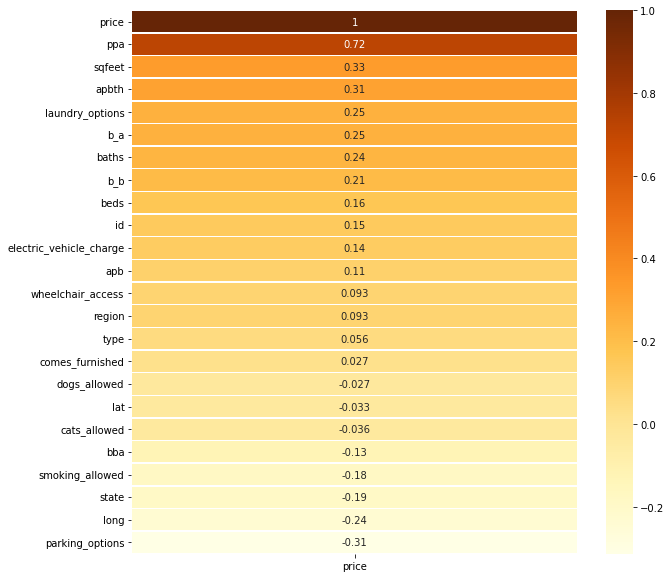

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()[['price']].sort_values(by='price', ascending=False)

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr, annot=True,cmap='YlOrBr', linewidths=.5)

Linear Regression

In [ ]:
# 'ppa','sqfeet','apbth','laundry_options','b_a','baths','b_b',parking_options','long'

x=df[['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'bba', 'apb', 'b_a','b_b', 'apbth','ppa']] 
y=df[['price']]

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# LinearRegression object
from sklearn.linear_model import LinearRegression
l_reg = LinearRegression()

# fitting
l_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred =  l_reg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# accuracy score 

score=r2_score(y_test,y_pred)
print('accquracy = ',score)
mse=mean_squared_error(y_test,y_pred)
print('MSE = ',mse)
from sklearn.metrics import mean_absolute_error 
print("MAE = " + str(mean_absolute_error(y_test, y_pred)))

accquracy =  0.8981979306675009
MSE =  0.0016980398093769827
MAE = 0.023482833399313868


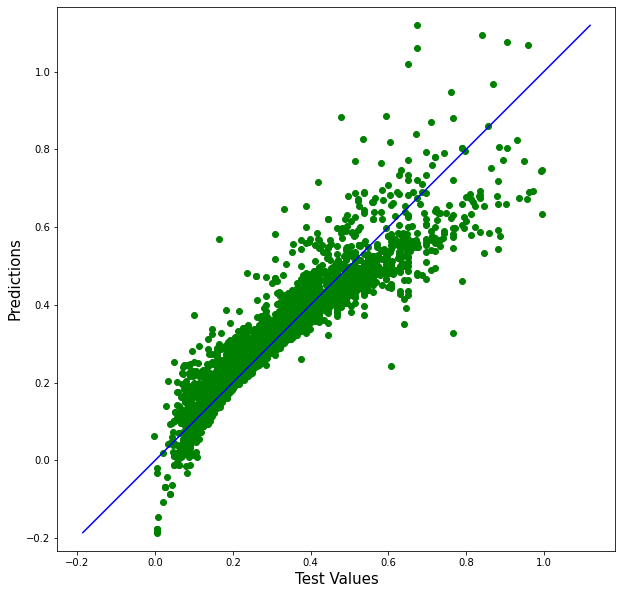

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Support vector machine

In [ ]:
# independent and dependent variables
X = df[['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'bba', 'apb', 'b_a','b_b', 'apbth','ppa']]
y= df[['price']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0) # 80% training and 20% test

# Feature Scaling

# sc_X = StandardScaler()
# X_train = sc_X.fit_transform(X_train)
# X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

reg = SVR()
param_grid = {'kernel': ['linear', 'poly', 'rbf']}
grid = GridSearchCV(reg, param_grid, cv=5)
grid.fit(X_train, np.ravel(y_train,order='C'))

print("Best parameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best parameters:  {'kernel': 'rbf'}
Best score:  0.9109377668857034


In [ ]:
from sklearn.svm import SVR

classifier = SVR(kernel='rbf')
classifier.fit(X_train, y_train)

# Predicting the Test Set Results

y_pred = classifier.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# accuracy score 

score=r2_score(y_test,y_pred)
print('accquracy = ',score)
mse=mean_squared_error(y_test,y_pred)
print('MSE = ',mse)
from sklearn.metrics import mean_absolute_error 
print("MAE = " + str(mean_absolute_error(y_test, y_pred)))

accquracy =  0.9173179470748447
MSE =  0.0014505940801580494
MAE = 0.028970658621165952


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


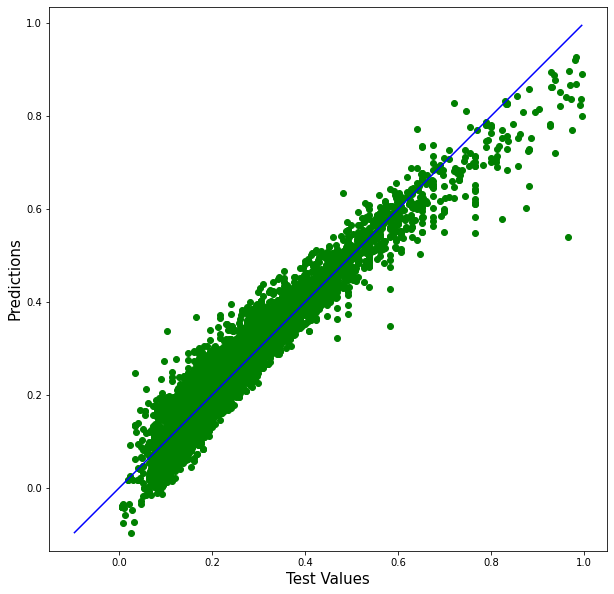

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

Random forest

In [ ]:
x=df[['sqfeet', 'beds', 'baths', 'smoking_allowed','laundry_options','parking_options','ppa','long','state','bba','apb','b_a','b_b','apbth','comes_furnished','electric_vehicle_charge','wheelchair_access','dogs_allowed','region','type','cats_allowed','dogs_allowed','lat']] 
y=df[['price']]

In [ ]:
#splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # 80% training and 20% test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# Hyperparameter tunning

# parameters
n_estimators = [100] # number of trees
max_features = ['auto', 'sqrt'] # number of features
max_depth = [10] # maximum number of levels allowed in each decision tree
min_samples_split = [2,4, 6, 8, 10] # minimum sample number to split a node
min_samples_leaf = [1,2, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_parameteres = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

# searching for hyperparameters 
from sklearn.model_selection import RandomizedSearchCV
rfr_random_search = RandomizedSearchCV(estimator = rfr,param_distributions = random_parameteres,
               n_iter = 10, cv = 3, verbose=2, random_state=35, n_jobs = -1)

In [ ]:
rfr_random_search.fit(X_train, np.ravel(y_train,order='C'))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [100]},
                   random_state=35, verbose=2)

In [ ]:
print ('Best Parameters: ', rfr_random_search.best_params_)

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 10, 'bootstrap': False}


In [ ]:
randmf = RandomForestRegressor(n_estimators = 100, min_samples_split = 4, min_samples_leaf= 2, max_features = 'auto', max_depth= 10, bootstrap= False) 
randmf.fit( X_train, np.ravel(y_train,order='C')) 

RandomForestRegressor(bootstrap=False, max_depth=10, min_samples_leaf=2,
                      min_samples_split=4)

In [ ]:
y_pred =  randmf.predict(  X_test )

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# accuracy score 

score=r2_score(y_test,y_pred)
print('accquracy = ',score)
mse=mean_squared_error(y_test,y_pred)
print('MSE = ',mse)
from sklearn.metrics import mean_absolute_error 
print("MAE = " + str(mean_absolute_error(y_test, y_pred)))

accquracy =  0.9935538581487139
MSE =  0.00011168068003693669
MAE = 0.005805415179282897


/usr/local/lib/python3.8/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


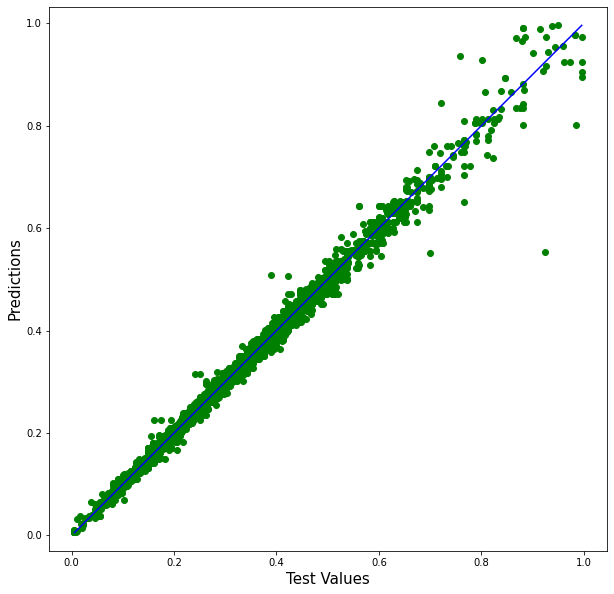

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

nueral network

In [ ]:
X = df[['region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'state', 'bba', 'apb', 'b_a','b_b', 'apbth','ppa']]
y= df[['price']]

In [ ]:
#splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Transform features by scaling each feature to a range between 0 and 1

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [ ]:
# number of nodes in each layer is the multiple of 2 

from tensorflow import keras
def buildModel(optimizer):
    # Initialising the ANN
    classifier = keras.Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(keras.layers.Dense(units = 64, activation = 'relu'))
    
    # Adding the second and third hidden layer
    classifier.add(keras.layers.Dense(units = 32, activation = 'relu'))
    classifier.add(keras.layers.Dense(units = 16, activation = 'relu'))
    
    # Adding the output layer with single output
    classifier.add(keras.layers.Dense(units = 1, activation = 'linear'))
    
    
    classifier.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['mean_absolute_error'])
    
    return classifier

In [ ]:
# Grid Search

from sklearn.model_selection import GridSearchCV 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

#hyperparameter tunning
reg = KerasRegressor(build_fn = buildModel)
parameters = {'batch_size': [128],                  #
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}

# cross validation of 3
grid_search = GridSearchCV(estimator = reg,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train, verbose = 0)

<ipython-input-77-b9de73b0c50b>:7: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  reg = KerasRegressor(build_fn = buildModel)


99/99 [==============================] - 0s 1ms/step


In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 128, 'epochs': 150, 'optimizer': 'adam'}


In [ ]:
bestClassifier = buildModel('adam')
HistoryBest = bestClassifier.fit(x = X_train, y = y_train, batch_size = 128, epochs =150 , verbose = 0)

In [ ]:
y_pred = bestClassifier.predict(X_test)

295/295 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# accuracy score 

score=r2_score(y_test,y_pred)
print('accquracy = ',score)
mse=mean_squared_error(y_test,y_pred)
print('MSE = ',mse)
from sklearn.metrics import mean_absolute_error 
print("MAE = " + str(mean_absolute_error(y_test, y_pred)))

accquracy =  0.9996903381958632
MSE =  5.432782133972431e-06
MAE = 0.0013580613184214435


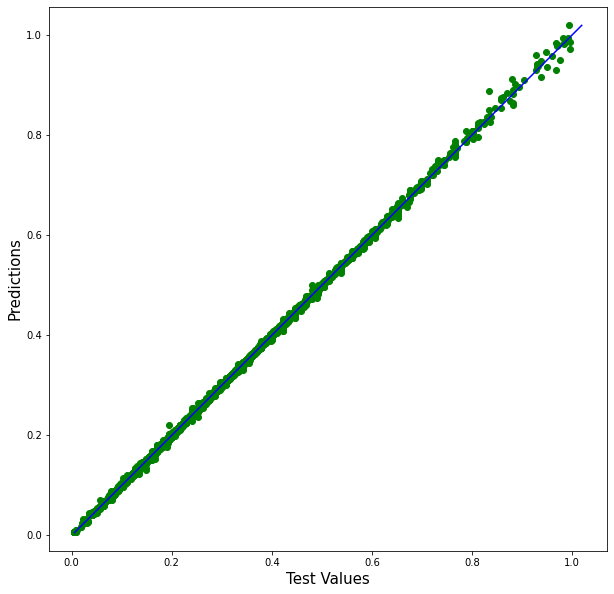

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_pred, c='green')


p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Test Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()